# PPO Algorithm

This code performs PPO on the Patrolling Zoo environment.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from patrolling_zoo.env.clean_patrolling_zoo import parallel_env
from patrolling_zoo.env.patrol_graph import PatrolGraph
from algorithm.clean_ppo import PPO, Agent

# set process priority low
import psutil
import os
if os.name == 'nt':
    psutil.Process(os.getpid()).nice(psutil.BELOW_NORMAL_PRIORITY_CLASS)
else:
    psutil.Process(os.getpid()).nice(10)

In [2]:
import tensorflow as tf
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
tensorboard_callback


# Configuration

In [3]:
total_timesteps = 3000*120
""" ENV SETUP """
patrolGraph = PatrolGraph("patrolling_zoo/env/4nodes.graph")
env = parallel_env(patrolGraph, 3,
    require_explicit_visit=False,
    speed= 1.0,
    alpha=2, # exponential bases for reward
    max_cycles=total_timesteps,
    observe_method = "raw",
    reward_method = "raw",
    stayLimit = 5,
)

"""ALGO PARAMS"""
algo = PPO(
    env = env,
    total_timesteps = total_timesteps,
    num_steps = 1000,
)

# Training

In [4]:
agent = algo.train()

Update: 1, total reward: 4028.551, timestep: 1000
Update: 2, total reward: 5036.756, timestep: 2000
Update: 3, total reward: 5894.711, timestep: 3000
Update: 4, total reward: 6708.675, timestep: 4000
Update: 5, total reward: 10003.854, timestep: 5000
Update: 6, total reward: 17236.514, timestep: 6000
Update: 7, total reward: 16878.449, timestep: 7000
Update: 8, total reward: 319738.312, timestep: 8000
Update: 9, total reward: 20662.055, timestep: 9000
Update: 10, total reward: 1722369.000, timestep: 10000
Update: 11, total reward: 36197.574, timestep: 11000
Update: 12, total reward: 33919.344, timestep: 12000
Update: 13, total reward: 5597008.000, timestep: 13000


KeyboardInterrupt: 

# Evaluation

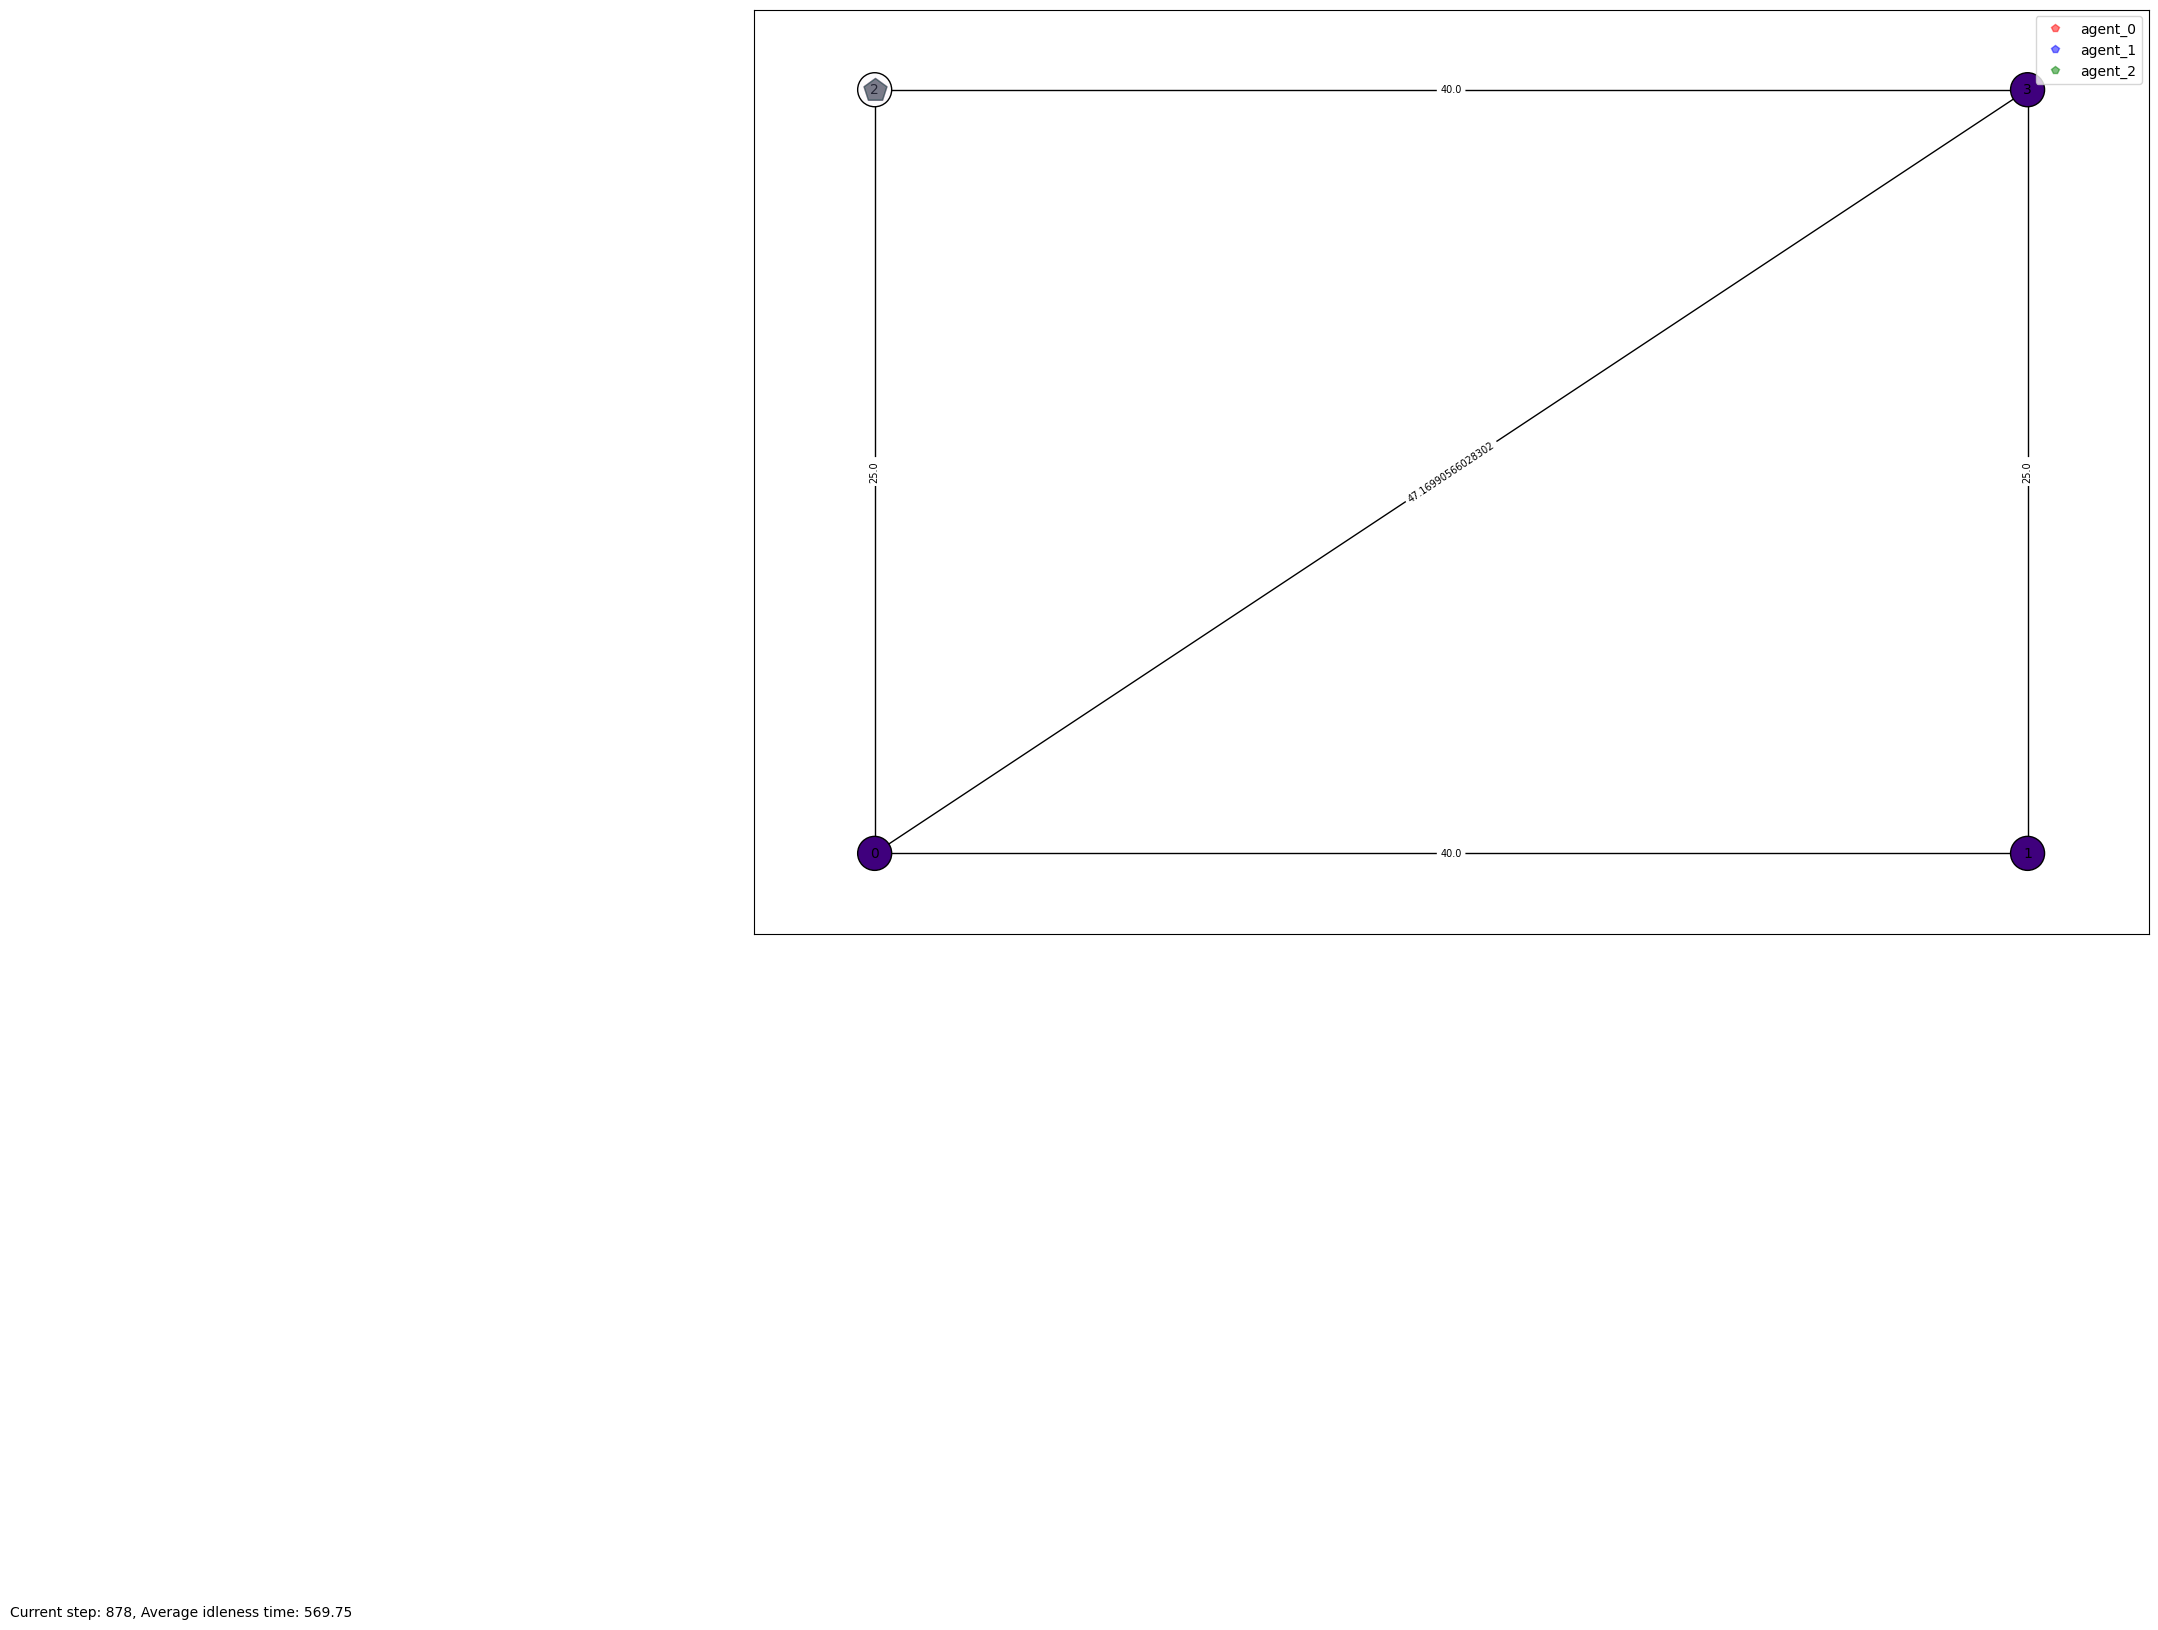

In [5]:
algo.evaluate(render=True, agent=algo.agent, max_cycles=1)